In [302]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_selection import SelectKBest,f_regression

In [303]:
df = pd.read_csv('ds_salaries.csv')
df.head()

,index,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [304]:
df.drop('index',axis=1,inplace=True)
df.shape

(607, 11)

In [305]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary                0
salary_currency       0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

### **Uni-variate Analysis**

In [306]:
df['remote_ratio']=df['remote_ratio'].map({0:'No Remote',50:'Partially Remote',100:'Full Remote'})
df['experience_level']=df['experience_level'].map({'MI':'Mid level','SE':'Senior level','EN':'Entry level','EX':'Executive level'})
df['employment_type']=df['employment_type'].map({'FT':'Full Time','CT':'Contract','FL':'Freelance','PT':'Part Time'})

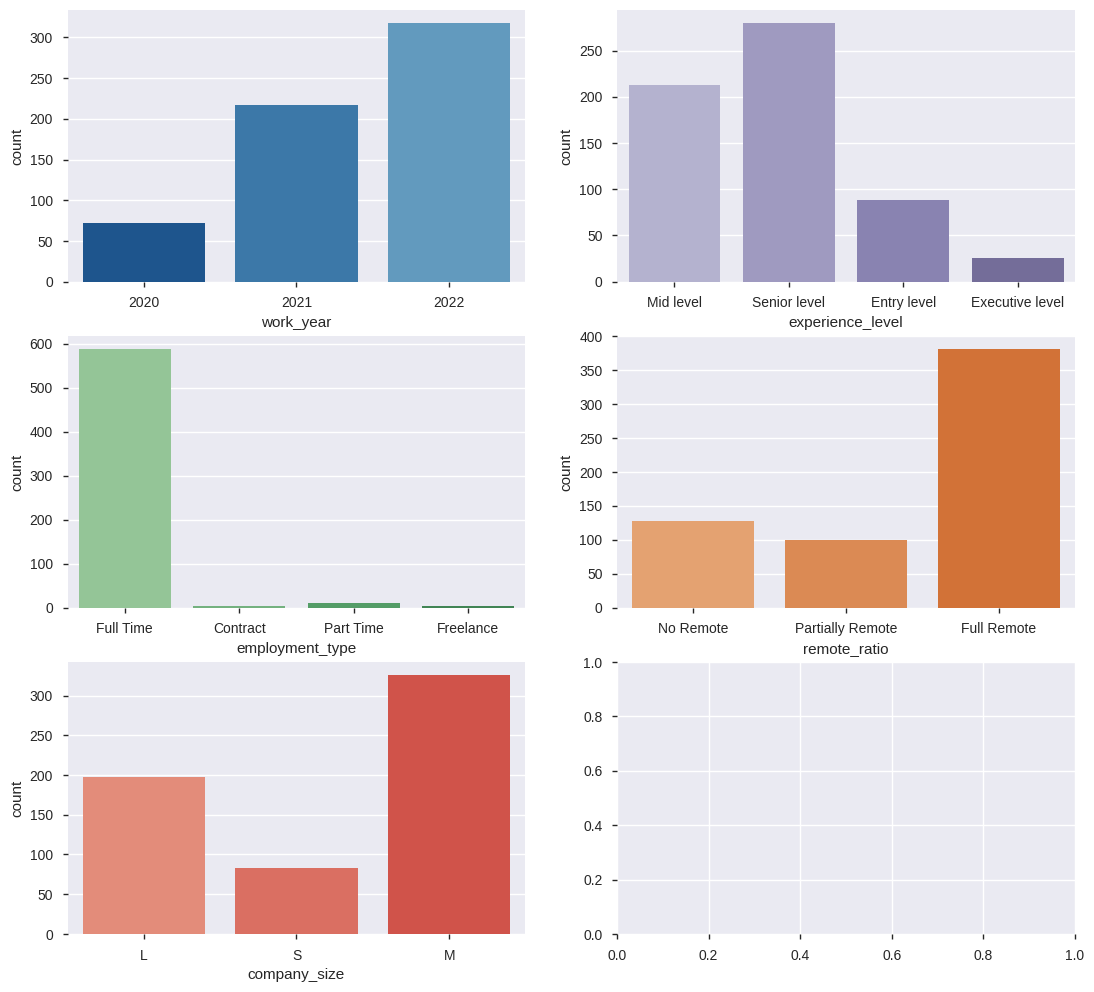

In [307]:
fig,axes = plt.subplots(3,2,figsize=(13,12))
ax1=sns.countplot(ax=axes[0,0],data=df, x="work_year",palette=sns.color_palette('Blues_r'))
ax2=sns.countplot(ax=axes[0,1],x="experience_level",data=df,palette=sns.color_palette('Purples_d'))
ax3=sns.countplot(ax=axes[1,0],data=df, x="employment_type",palette=sns.color_palette('Greens_d'))
ax4=sns.countplot(ax=axes[1,1],data=df, x="remote_ratio",palette=sns.color_palette('Oranges_d'))
ax5=sns.countplot(ax=axes[2,0],data=df, x="company_size",palette=sns.color_palette('Reds_d'))
plt.show()

**Insights from the above plots**

1.   We can observe that the no. of jobs in the field of data increases with as the year goes.
2.  Most of instances available are for the Mid level and Senior level roles
3. Most of the instances available are from the individuals having Full time jobs and others are relatively negligible.
4. Most of the instances available are from the individuals having Full time remote jobs
5. Medium size employee candidates are more favoured



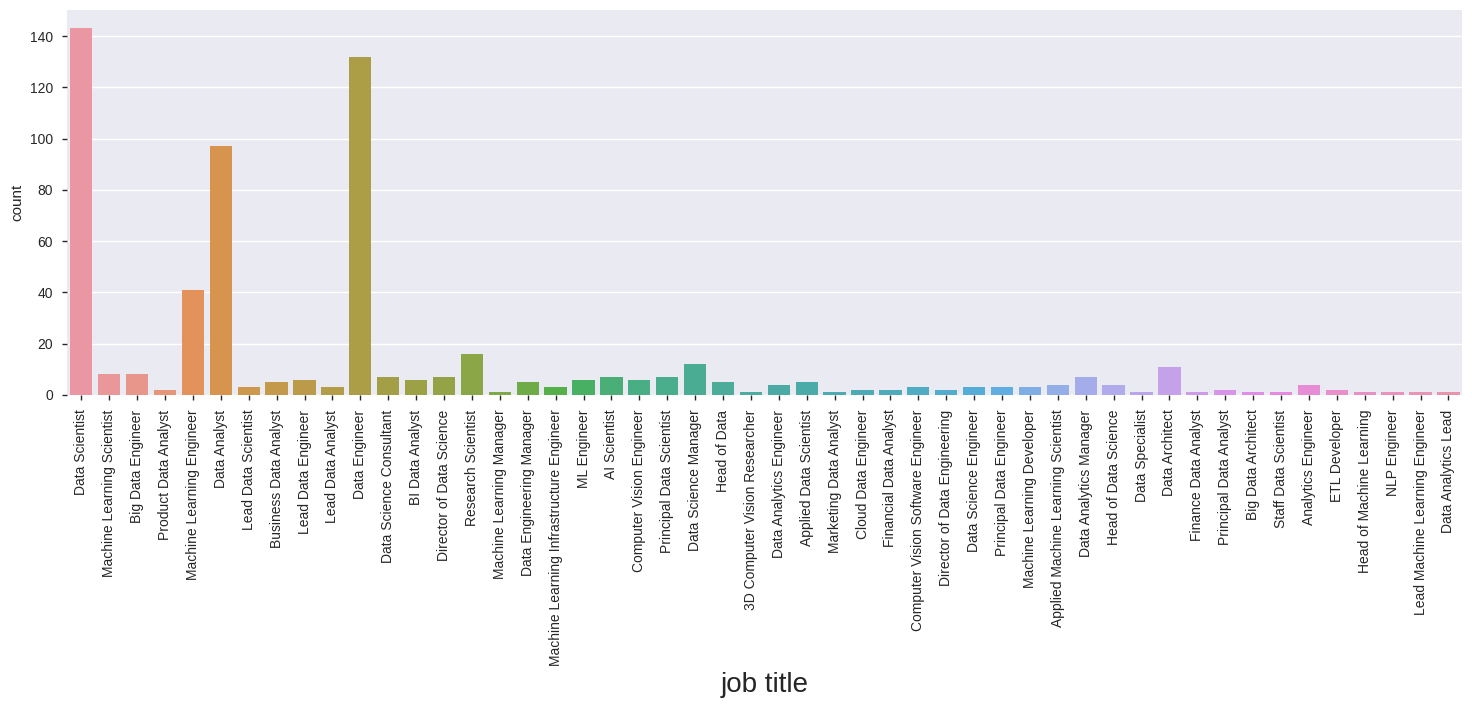

In [309]:
plt.figure(figsize=(18,5))
sns.countplot(x=df['job_title'])
plt.xticks(rotation=90)
plt.xlabel('job title',fontsize=20)
plt.show()

Top most demanding job titles are **Data scientist, Data engineer, Data Analyst, Machine Learning engineer, Research scientist**

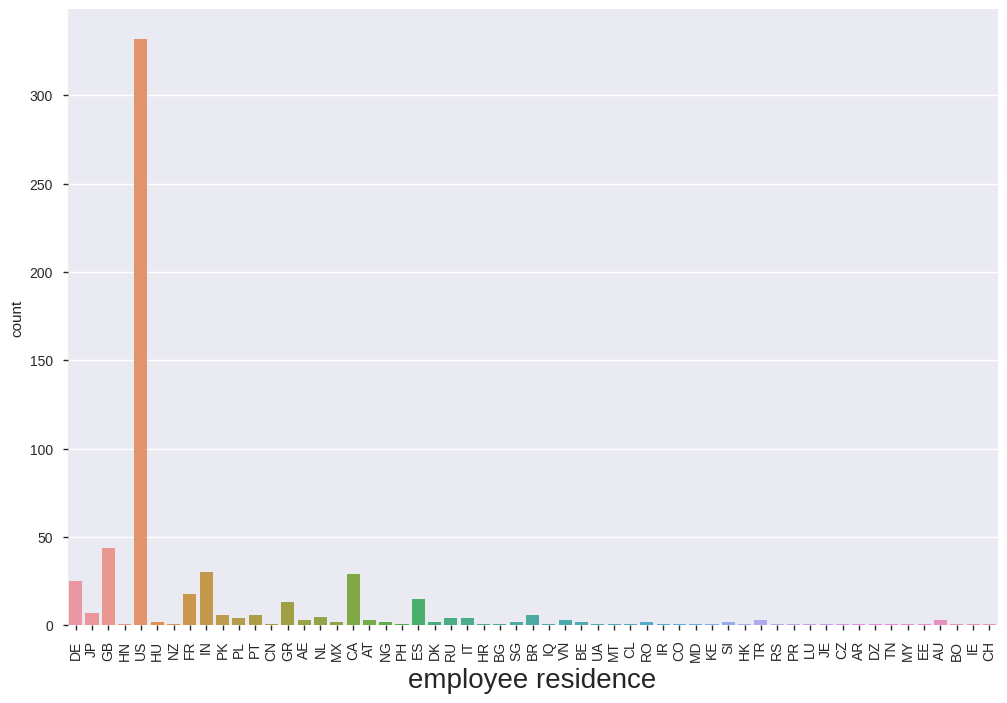

In [310]:
plt.figure(figsize=(12,8))
sns.countplot(x=df['employee_residence'])
plt.xticks(rotation=90)
plt.xlabel('employee residence',fontsize=20)
plt.show()

Data instances are more biased towards Unites States indicating that most of employees live in United States. This might happen due to unavalibilty of the data

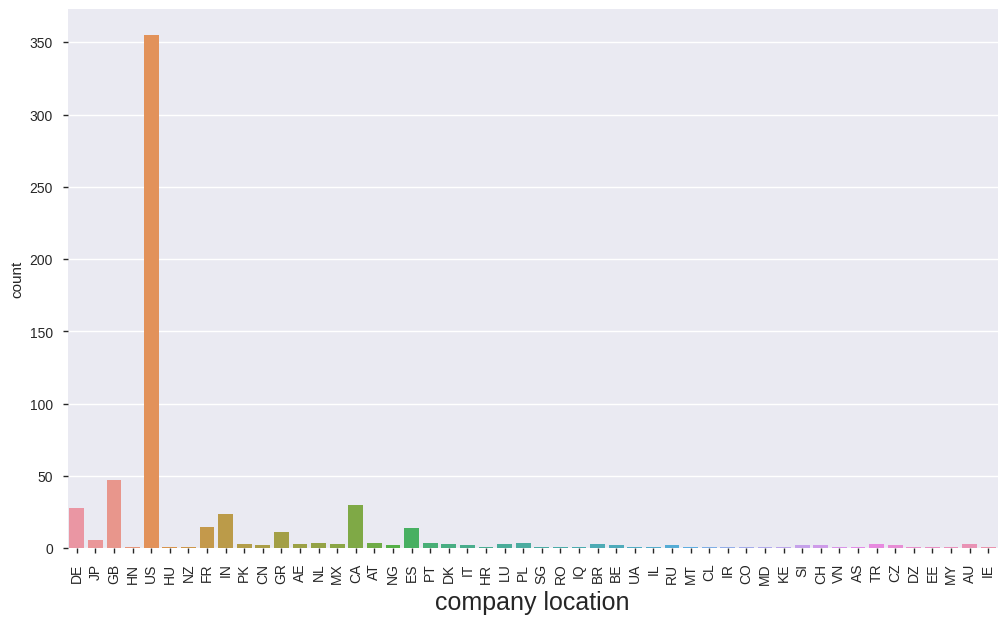

In [311]:
plt.figure(figsize=(12,7))
sns.countplot(x=df['company_location'])
plt.xticks(rotation=90)
plt.xlabel('company location',fontsize=18)
plt.show()

Here the data instances are more biased towards United States indicating that most of the most of the companies are located in United states. This might be due to insufficient data.  

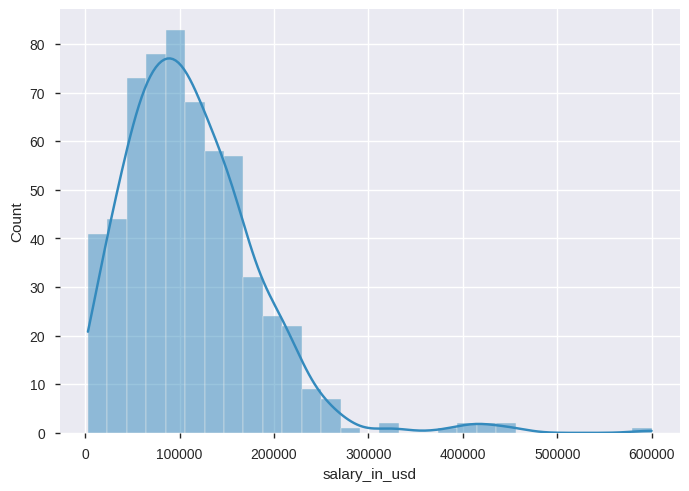

In [314]:
sns.histplot(data=df,x=df['salary_in_usd'],kde=True)

The salaries are ranging from 0 to $250k. Also we can observe some exceptional values or outliers. Since the above distribution is right-skewed , it's better to consider median salary for the future comparisions. 

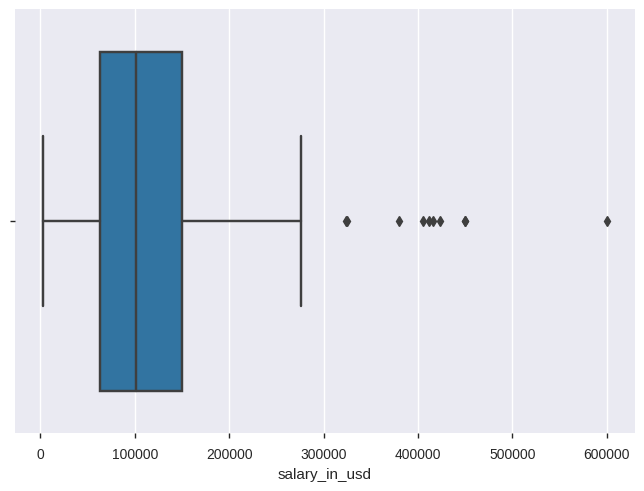

In [220]:
sns.boxplot(x=df['salary_in_usd'])

**Bi-Variate Analysis**

Text(0, 0.5, 'Salary (in USD)')

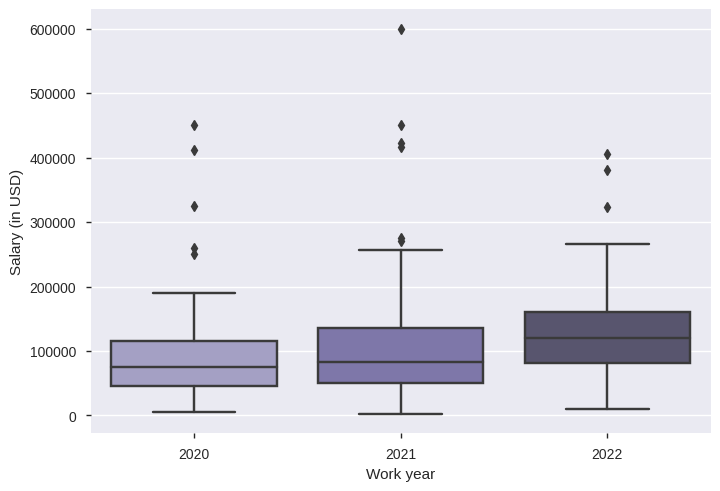

In [221]:
sns.boxplot(data=df, x=df['work_year'], y=df['salary_in_usd'],palette='Purples_d')
plt.xlabel('Work year')
plt.ylabel('Salary (in USD)')

Here we can observe that as the work year increases, the salary also increases, which means these two relations are highly correlated

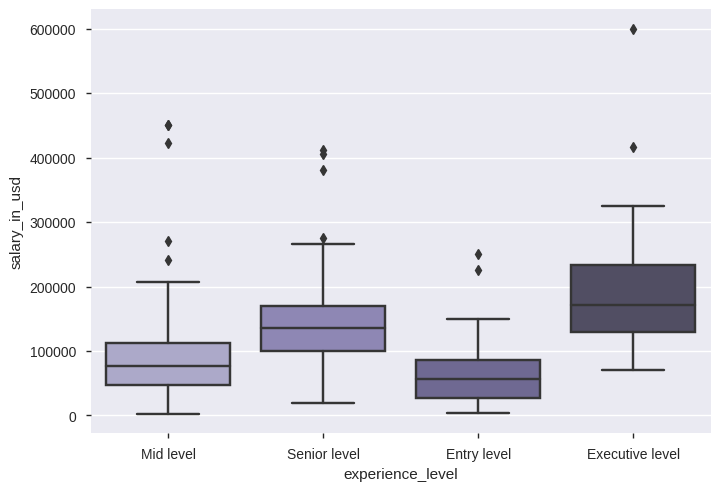

In [222]:
# fig, ax = plt.subplots(1, 1, figsize=(7, 5))
sns.boxplot(data=df, x=df['experience_level'], y=df['salary_in_usd'],palette='Purples_d')

1. The **highest Median salary** of a executive-level employee is around **150k dollars**.
2. Second highest median salary of a Senior-level employee is around **120k dollars**.
3. Median salary of Mid-level is around **75k dollars**.
4. Median salary of entry-level employee is around **50k dollars**.

Text(0, 0.5, 'Salary (in USD)')

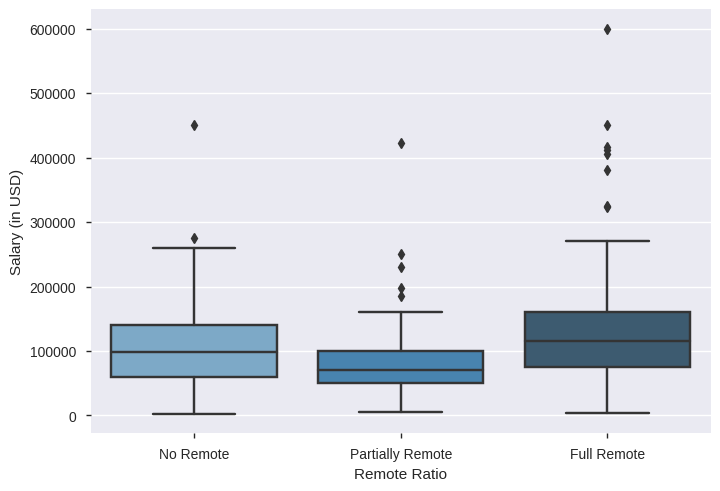

In [223]:
sns.boxplot(data=df, x=df['remote_ratio'], y=df['salary_in_usd'],palette='Blues_d')
plt.xlabel('Remote Ratio')
plt.ylabel('Salary (in USD)')

Here we observe that the individuals having Full Remote jobs have the highest median salary of around **120k dollars** .

Text(0, 0.5, 'Salary (in USD)')

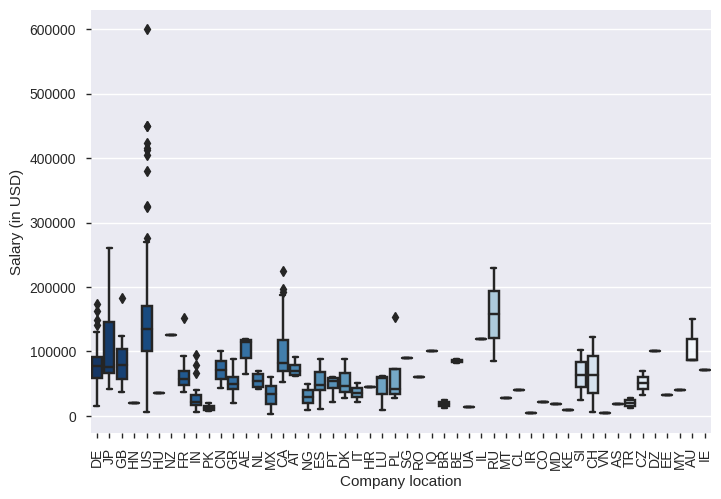

In [224]:

sns.boxplot(data=df, x=df['company_location'], y=df['salary_in_usd'],palette='Blues_r')
plt.xticks(rotation=90)
plt.xlabel('Company location')
plt.ylabel('Salary (in USD)')

Here we can observe that the Companies in **USA** and **Russia** offer the highest median salaries. This observation is too biased because Russia is only 1% of the whole data, if we had more data , then the median salary of Russia might vary

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 <a list of 50 Text major ticklabel objects>)

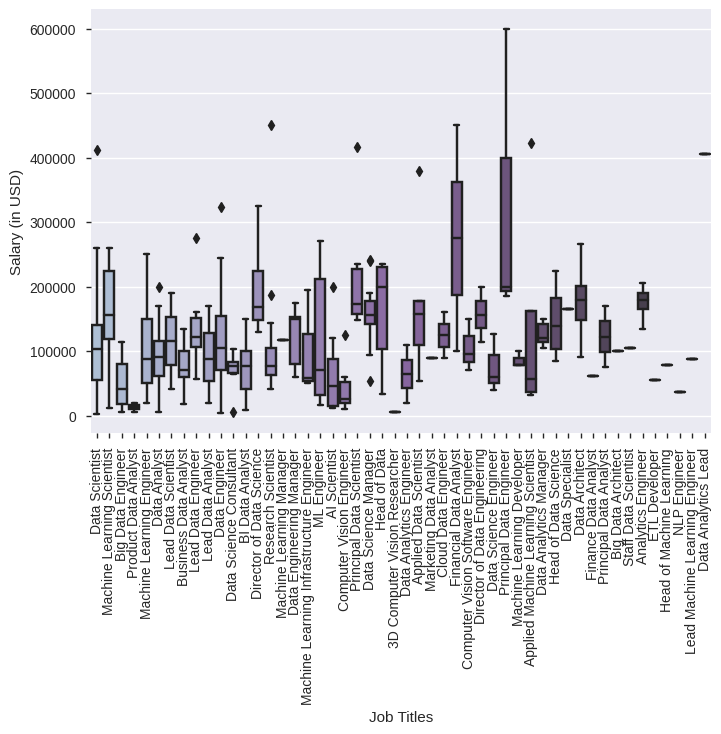

In [225]:
sns.boxplot(data=df, x=df['job_title'], y=df['salary_in_usd'],palette='BuPu_d')
plt.xlabel('Job Titles')
plt.ylabel('Salary (in USD)')
plt.xticks(rotation=90)

From this graph, we can observe that **Financial Data Analyst and Principle Data engineer** have the highest median salaries. Even this observation is too biased because most of job tiles have only 1 entry . If there was more data available, then the median salaries may vary.

Text(0, 0.5, 'Salary (in USD)')

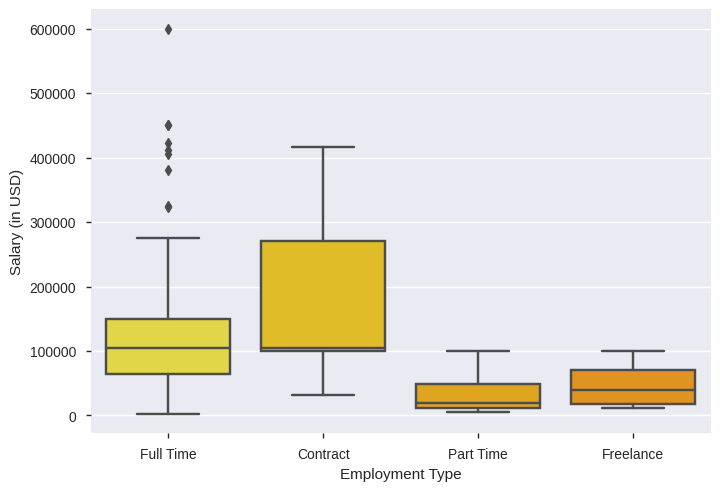

In [226]:
sns.boxplot(data=df, x=df['employment_type'], y=df['salary_in_usd'],palette='Wistia')
plt.xlabel('Employment Type')
plt.ylabel('Salary (in USD)')
# plt.xticks(rotation=90)

The median salary of full time employment is the highest with around 115k dollars. Again the data is highly based, so we cannot conclude which employment type is much better or worth it

## **Data Wrangling**

In [227]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2020,Mid level,Full Time,Data Scientist,70000,EUR,79833,DE,No Remote,DE,L
1,2020,Senior level,Full Time,Machine Learning Scientist,260000,USD,260000,JP,No Remote,JP,S
2,2020,Senior level,Full Time,Big Data Engineer,85000,GBP,109024,GB,Partially Remote,GB,M
3,2020,Mid level,Full Time,Product Data Analyst,20000,USD,20000,HN,No Remote,HN,S
4,2020,Senior level,Full Time,Machine Learning Engineer,150000,USD,150000,US,Partially Remote,US,L


### **Label Encoding**

In [321]:
df['work_year']=df['work_year'].astype('category')
cat_cols = [col for col in df.columns if df[col].dtype=='O']
# cat_cols
# from sklearn.preprocessing import LabelEncoder
df['work_year']=df['work_year'].cat.codes
le=LabelEncoder()
for col in cat_cols:
  df[col]=le.fit_transform(df[col])
# df.head()

In [322]:
df.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,70000,7,79833,14,1,12,0
1,0,3,2,41,260000,16,260000,32,1,29,2
2,0,3,2,7,85000,8,109024,20,2,18,1
3,0,2,2,47,20000,16,20000,23,1,20,2
4,0,3,2,38,150000,16,150000,55,2,48,0


### **Handling outliers**

The interquartile range (IQR) tells you the range of the middle half of your dataset. You can use the IQR to create “fences” around your data and then define outliers as any values that fall outside those fences.


In [323]:
#Inter-quartile range
Q1 = np.percentile(df["salary_in_usd"], 25, interpolation = 'midpoint')
Q2 = np.percentile(df["salary_in_usd"], 50, interpolation = 'midpoint')  
Q3 = np.percentile(df["salary_in_usd"], 75, interpolation = 'midpoint')
IQR = Q3 - Q1
lower_fence = Q1 - 1.5 * IQR
upper_fence = Q3 + 1.5 * IQR
outliers=[x for x in df['salary_in_usd'] if x<=lower_fence or x>=upper_fence]
outliers

[325000,
 450000,
 412000,
 450000,
 423000,
 416000,
 600000,
 324000,
 380000,
 405000]

In [324]:
## As there are very less no.of outliers we can drop those values
df.drop(df[df['salary_in_usd']>=324000].index,inplace=True)

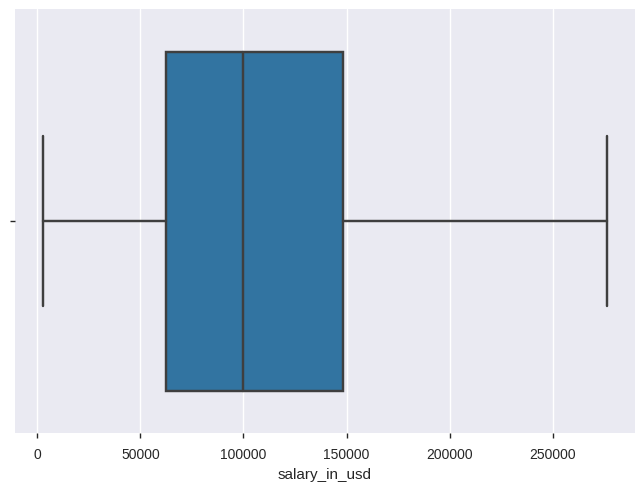

In [325]:
sns.boxplot(x=df['salary_in_usd'])

### **Feature selection**

In [326]:
X = df.drop(['salary','salary_in_usd','salary_currency'],axis=1)  #independent columns
y = df['salary_in_usd']   
bestfeatures = SelectKBest(score_func=f_regression, k=5)
fit = bestfeatures.fit_transform(X,y)
print(fit[:5])

[[ 0  2 14  1 12]
 [ 0  3 32  1 29]
 [ 0  3 20  2 18]
 [ 0  2 23  1 20]
 [ 0  3 55  2 48]]


In [327]:
X.head()

,work_year,experience_level,employment_type,job_title,employee_residence,remote_ratio,company_location,company_size
0,0,2,2,22,14,1,12,0
1,0,3,2,41,32,1,29,2
2,0,3,2,7,20,2,18,1
3,0,2,2,47,23,1,20,2
4,0,3,2,38,55,2,48,0


In [328]:
x_d=df.copy(['experience_level','company_location','work_year','company_size'])
y_d=df['salary_in_usd']

In [330]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x_d,y_d,test_size=0.2,random_state = 0)
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [331]:
print(model.intercept_)
print(model.coef_)
pred=model.predict(X_test)
predictions = pred.reshape(-1,1)
from sklearn.metrics import mean_squared_error
print('MSE : ', mean_squared_error(y_test,predictions))
print('RMSE : ', np.sqrt(mean_squared_error(y_test,predictions)))

-7.275957614183426e-11
[ 1.56818217e-12  2.52695365e-11 -1.38238829e-11 -5.73217972e-14
  8.32667268e-17 -1.36869382e-12  1.00000000e+00 -2.66114882e-15
 -6.01565275e-14 -2.20761672e-14  1.59323518e-13]
MSE :  5.724479303072028e-20
RMSE :  2.3925884107117187e-10
